# Cvičení

In [14]:
import pandas
import seaborn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pandas.read_csv("house_prices.csv")
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946+,RL,65.0,8450,Pave,NaN,0,Lvl,3,...,0,0,0,NaN,0,Feb,2008,WD,Normal,208500
1,2,1-STORY 1946+,RL,80.0,9600,Pave,NaN,0,Lvl,3,...,0,0,0,NaN,0,May,2007,WD,Normal,181500
2,3,2-STORY 1946+,RL,68.0,11250,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Sept,2008,WD,Normal,223500
3,4,2-STORY 1945-,RL,60.0,9550,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Feb,2006,WD,Abnorml,140000
4,5,2-STORY 1946+,RL,84.0,14260,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Dec,2008,WD,Normal,250000



## Plocha garáže

Uvažujme nyní plochu garáže (`GarageArea`). 

Ovlivňuje plocha garáže cenu domu? Ověř to pomocí korelace mezi oběma hodnotami. 


In [15]:
correlation_garage = data[["GarageArea", "SalePrice"]]
correlation_garage.corr()

,GarageArea,SalePrice
GarageArea,1.000000,0.636964
SalePrice,0.636964,1.000000


Dále se podívej na bodový graf obou hodnot. Je z grafu vidět rozdílná síla závislosti oproti obytné ploše domu? 

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

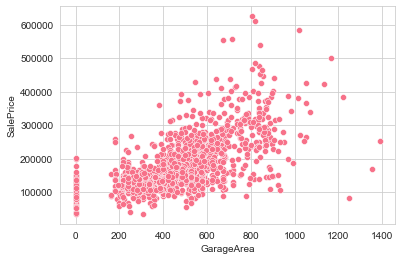

In [16]:
seaborn.scatterplot(data=data, x="GarageArea", y="SalePrice")

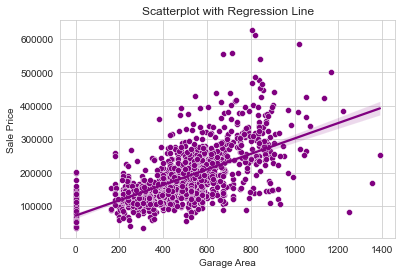

In [17]:
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl")

sns.scatterplot(data=data, x="GarageArea", y="SalePrice", color="purple")
sns.regplot(data=data, x="GarageArea", y="SalePrice", scatter=False, color="purple")

plt.title("Scatterplot with Regression Line")
plt.xlabel("Garage Area")
plt.ylabel("Sale Price")

plt.show()


Dále zkus prověřit plochu pozemku včetně nezastavěných částí (`LotArea`).

In [19]:
correlation_garage = data[["GarageArea", "SalePrice", "LotArea"]]
correlation_garage.corr()

,GarageArea,SalePrice,LotArea
GarageArea,1.000000,0.636964,0.162183
SalePrice,0.636964,1.000000,0.269866
LotArea,0.162183,0.269866,1.000000


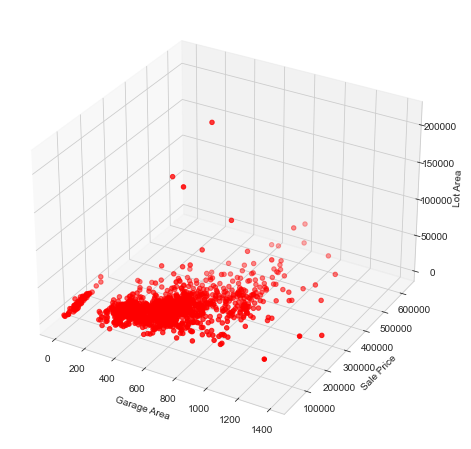

In [20]:
correlation_garage = data[["GarageArea", "SalePrice", "LotArea"]]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = correlation_garage["GarageArea"]
y = correlation_garage["SalePrice"]
z = correlation_garage["LotArea"]

ax.set_xlabel("Garage Area")
ax.set_ylabel("Sale Price")
ax.set_zlabel("Lot Area")

ax.scatter(x, y, z, c='r', marker='o')

plt.show()


## Plocha pozemku

Uvažujme nyní plochu pozemku, na kterém dům stojí (`LotArea`). 

Ovlivňuje plocha pozemku cenu domu? Opět se podívej na hodnotu korelace mezi cenou domu a plochou pozemku a zobraz si vztah mezi hodnotami pomocí grafu. 

In [21]:
correlation_lot = data[["SalePrice", "LotArea"]]
correlation_lot.corr()

,SalePrice,LotArea
SalePrice,1.000000,0.269866
LotArea,0.269866,1.000000


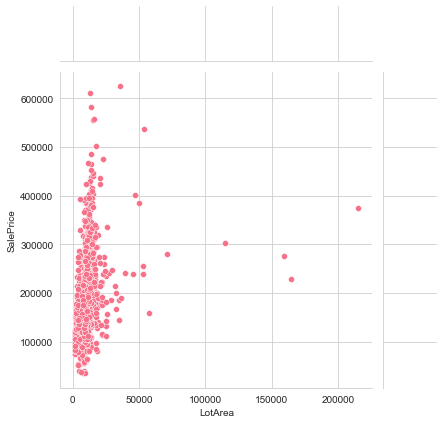

In [22]:
g = seaborn.JointGrid(data=data, x="LotArea", y="SalePrice")
g.plot_joint(seaborn.scatterplot, legend=False)

Dále se podívej na korelaci mezi plochou pozemku a obytnou plochou domu. 

Je zde nějaká korelace, tj. platí, že čím větší je obytná plocha domu, tím větší má tendenci být pozemek?


In [23]:
correlation_lot = data[["GrLivArea", "LotArea"]]
correlation_lot.corr()

,GrLivArea,LotArea
GrLivArea,1.000000,0.231887
LotArea,0.231887,1.000000


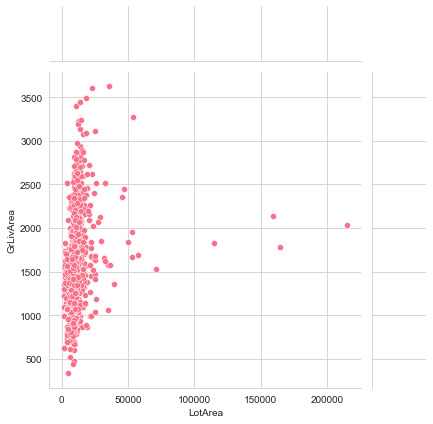

In [24]:
g = seaborn.JointGrid(data=data, x="LotArea", y="GrLivArea")
g.plot_joint(seaborn.scatterplot, legend=False)

## Bonus

## Popisná statistika jednou metodou

Pandas umožňuje zobrazit všechny důležité statistické ukazatele jednou metodou, a to metodou `.describe()`, kterou můžeš použít pro jeden sloupec, více vybraných sloupců či celou tabulku. Zkus použít metodou pro sloupec `GrLivArea`a odpověz na následující otázky.

In [ ]:
data["GrLivArea"].describe()

count    1456.000000
mean     1506.502060
std       496.815378
min       334.000000
25%      1128.000000
50%      1458.500000
75%      1775.250000
max      3627.000000
Name: GrLivArea, dtype: float64

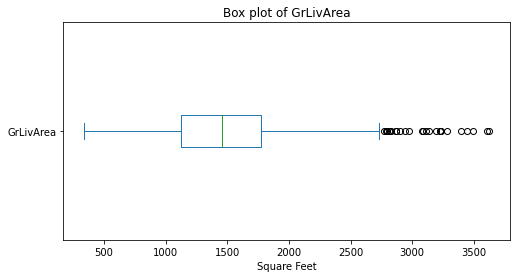

In [ ]:
data["GrLivArea"].plot(kind="box", vert=False, figsize=(8,4))

plt.title("Box plot of GrLivArea")
plt.xlabel("Square Feet")

plt.show()

- Jaká je průměrná obytná plocha domu?


In [29]:
mean = data["GrLivArea"].describe().loc['mean']
print(f"Průměrná obytná plocha domu je {round(mean)}.")

Průměrná obytná plocha domu je 1507.


- Má většina domů větší či menší obytnou plochu než 1500 čtverečních stop?

In [30]:
median = data["GrLivArea"].describe().loc['50%']
print(f"Medián je {round(median)} -> většina domu má menší obytnou plochu než 1500 čtverečních stop.")

Medián je 1458 -> většina domu má menší obytnou plochu než 1500 čtverečních stop.


- Dokážeš z těchto dat určit kvadratické rozpětí - rozdíl mezi 75%ním a 25%ním kvantilem. Jedná se o ukazatel polohy nebo ukazatel variability?

In [34]:
q25 = data["GrLivArea"].describe().loc['25%']
q75 = data["GrLivArea"].describe().loc['75%']
print(f"Kvadrické rozpětí (ukazatel variability) je {round(q75-q25)}.")

Kvadrické rozpětí (ukazatel variability) je 647.


V datech není rozptyl, ale je tam záhadná hodnota, která je označená jako `std`. 

Pokud zadáš zkratku do Google, zjistíš, že STD může znamenat sexuálně přenosné choroby, což není tento případ. 

Zkus třeba zadat do Google `std` v kombinaci s výrazem `pandas`. 

Tím se dostaneš na [tuto stránku v dokumentaci](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html). 

Tím bys zjistila, že jde o "standard deviation". 

Zkus nyní pomocí Google najít, co to vlastně je.

Můžeš například otevřít Wikipedii, kde je stránka o tomto pojmu i v češtině.

In [39]:
print(f"`std` je směrodatná odchylka a spočítáme ji jako odmocnitu rozptylu.")

std = data["GrLivArea"].describe().loc['std']
print(f"\n{round(std)}")

`std` je směrodatná odchylka a spočítáme ji jako odmocnitu rozptylu.

497
